# Importing libraries

**Tensorflow**
(*Version 2.9.2*)

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.


[Source - Wikipedia](https://en.wikipedia.org/wiki/TensorFlow)

**Matplotlib**

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

[Source - Matplotlib](https://matplotlib.org/)

**NumPy**
(*Version 1.21.6*)

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

[Source - NumPy](https://en.wikipedia.org/wiki/NumPy)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
from random import choice, uniform
from numpy.random import randint

# Loading the CIFAR-10 Dataset

#### **Dataset**
The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images. 

[Source - CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

##### **Classes**

  0. airplane
  1. automobile
  2. bird
  3. cat
  4. deer
  5. dog
  6. frog
  7. horse
  8. sheep
  9. truck


##### **Dimesions**

*Training* : x_train and y_train

*Validation* : x_test and y_test

Since this is a colored image, there are 3 dimensions (R, G, B) of each image, resulting in a dimension of 32 x 32 x 3. Similarly, the dimension of the label (y_train, y_test) for each image is (1,) whose value is one of the classes mentioned above.




170498071/170498071 [==============================] - 14s 0us/step
Dimesions:
x_train (50000, 32, 32, 3)
y_train (50000, 1)
x_test (10000, 32, 32, 3)
x_test (10000, 1)


The Dimesion of the 20th image: (32, 32, 3)
Label of 20th image: [6]


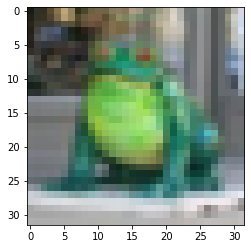

In [ ]:
# Loading the CIFAR-10 Dataset
cifar_10 = tf.keras.datasets.cifar10

# Unpacking the dataset
(x_train, y_train), (x_test, y_test) = cifar_10.load_data()

# Dimension of the training and testing sets.
print('Dimesions:')
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('x_test', y_test.shape)

print('\n')

# Show Image
plt.imshow(x_train[19], cmap = plt.cm.binary)

# Printing Dimesions of the 20th image
print('The Dimesion of the 20th image:', x_train[19].shape)
print('Label of 20th image:', y_train[19])

# Data Preprocessing


#### **Normalization**

The values span across from 0 - 255, which can make the convergence slower. To reduce execution time and to reach a faster convergence we are normalizing the data.


#### **One Hot Encoding**

The labels are one-hot encoded, meaning for 'cat' whose label is 3 will be [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]








In [ ]:
# Normalization
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Function for plotting Train/Validation Accuracy and Loss


[Source - Plotting](http://learnandshare645.blogspot.com/)

In [ ]:
def acc_loss_plot(hist, number_of_epochs):

  train_loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  train_acc = hist.history['Accuracy']
  val_acc = hist.history['val_Accuracy']

  epoch_range = range(number_of_epochs)

  plt.figure(1,figsize=(7,5))
  plt.plot(epoch_range,train_loss)
  plt.plot(epoch_range,val_loss)
  plt.xlabel('# of Epochs')
  plt.ylabel('Loss')
  plt.title('Training vs Validation Loss')
  plt.grid(True)
  plt.legend(['train','validation'])
  plt.style.use(['classic'])

  plt.figure(2,figsize=(7,5))
  plt.plot(epoch_range,train_acc)
  plt.plot(epoch_range,val_acc)
  plt.xlabel('# of Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training vs Validation Accuracy')
  plt.grid(True)
  plt.legend(['train','validation'], loc=4)
  plt.style.use(['classic'])

# Architecture


In [ ]:
def CNN_model(opt, num_epochs, batch_size, loss_function, act_1, act_2):

  model = tf.keras.models.Sequential()

  model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = act_1, input_shape = x_train.shape[1:]))
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = act_1))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = act_2))
  model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = act_2))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(rate = 0.15))
  model.add(Flatten())
  model.add(Dense(units = 64, activation = act_2))
  model.add(Dense(10, activation= "softmax"))

  model.compile(loss = loss_function, optimizer = opt, metrics = 'Accuracy')
  hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs, verbose = 2, shuffle = True, 
                   validation_data = (x_test, y_test))

  return hist

# Model 1 - Stochastic Gradient Descent

In the first model, we used the Stochastic Gradient Descent Optimizer with the Categorical Cross Entropy Loss Function.

After running 3 times, the average validation accuracy is 71.66% 

In our model, the configuration for our optimizer (SGD) are as follows - 

 - Learning rate : 0.01
 - Momentum : 0.8
 - Nesterov : True

#### **Parameters**

- Optimizer : Stochastic Gradient Descent (SGD)
- Loss Function : Categorical Cross-Entropy
- Epochs : 30
- Activation : Relu and Softmax (Final Layer)
- Batch size : 32
- Input : Normalized 32 x 32 x 3 images
- Metrics : Accuracy


Epoch 1/30
1563/1563 - 7s - loss: 2.0126 - Accuracy: 0.2626 - val_loss: 1.7098 - val_Accuracy: 0.3855 - 7s/epoch - 4ms/step
Epoch 2/30
1563/1563 - 6s - loss: 1.5420 - Accuracy: 0.4490 - val_loss: 1.4712 - val_Accuracy: 0.4793 - 6s/epoch - 4ms/step
Epoch 3/30
1563/1563 - 6s - loss: 1.2813 - Accuracy: 0.5494 - val_loss: 1.1836 - val_Accuracy: 0.5823 - 6s/epoch - 4ms/step
Epoch 4/30
1563/1563 - 6s - loss: 1.1024 - Accuracy: 0.6131 - val_loss: 1.0647 - val_Accuracy: 0.6295 - 6s/epoch - 4ms/step
Epoch 5/30
1563/1563 - 6s - loss: 0.9653 - Accuracy: 0.6613 - val_loss: 1.0292 - val_Accuracy: 0.6353 - 6s/epoch - 4ms/step
Epoch 6/30
1563/1563 - 6s - loss: 0.8499 - Accuracy: 0.7011 - val_loss: 0.9382 - val_Accuracy: 0.6699 - 6s/epoch - 4ms/step
Epoch 7/30
1563/1563 - 6s - loss: 0.7568 - Accuracy: 0.7343 - val_loss: 0.9154 - val_Accuracy: 0.6890 - 6s/epoch - 4ms/step
Epoch 8/30
1563/1563 - 6s - loss: 0.6762 - Accuracy: 0.7619 - val_loss: 0.8868 - val_Accuracy: 0.6961 - 6s/epoch - 4ms/step
Epoch 9/

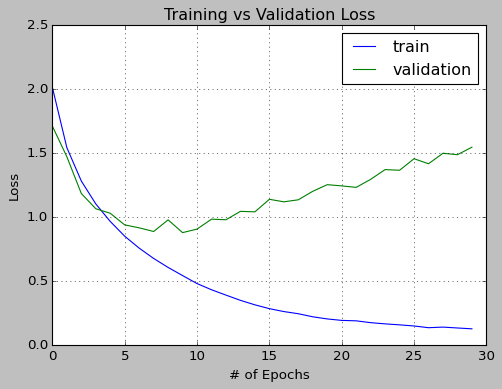

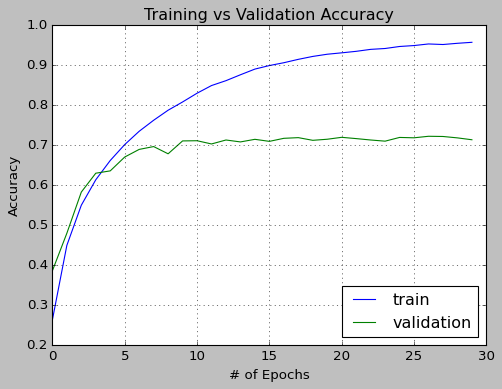

In [ ]:
num_epochs = 30
batch_size = 32
loss_function = 'categorical_crossentropy'

# For SGD
sgd = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.8, nesterov = True)

act_1 = "relu"
act_2 = "relu"

SGD_hist = CNN_model(sgd, num_epochs, batch_size, loss_function, act_1, act_2)
acc_loss_plot(SGD_hist, num_epochs)

# Model 2 - ADAM.

As our second model, we used the same architecture with the Adam optimizer and Categorical Cross Entropy Loss Function.

After running 3 times, the average validation accuracy is about 72.7%

#### **Parameters**

- Optimizer : Adam
- Loss Function : Categorical Cross-Entropy
- Epochs : 30
- Activation : Relu and Softmax (Final Layer)
- Batch size : 32
- Input : Normalized 32 x 32 x 3 images
- Kernel : 3 x 3
- Metrics : Accuracy

Epoch 1/30
1563/1563 - 7s - loss: 1.6531 - Accuracy: 0.3984 - val_loss: 1.3191 - val_Accuracy: 0.5273 - 7s/epoch - 4ms/step
Epoch 2/30
1563/1563 - 6s - loss: 1.1959 - Accuracy: 0.5780 - val_loss: 1.0667 - val_Accuracy: 0.6204 - 6s/epoch - 4ms/step
Epoch 3/30
1563/1563 - 6s - loss: 0.9979 - Accuracy: 0.6489 - val_loss: 0.9358 - val_Accuracy: 0.6757 - 6s/epoch - 4ms/step
Epoch 4/30
1563/1563 - 6s - loss: 0.8833 - Accuracy: 0.6901 - val_loss: 0.8918 - val_Accuracy: 0.6900 - 6s/epoch - 4ms/step
Epoch 5/30
1563/1563 - 6s - loss: 0.8002 - Accuracy: 0.7172 - val_loss: 0.8782 - val_Accuracy: 0.6976 - 6s/epoch - 4ms/step
Epoch 6/30
1563/1563 - 6s - loss: 0.7410 - Accuracy: 0.7394 - val_loss: 0.8561 - val_Accuracy: 0.7037 - 6s/epoch - 4ms/step
Epoch 7/30
1563/1563 - 6s - loss: 0.6892 - Accuracy: 0.7579 - val_loss: 0.8308 - val_Accuracy: 0.7226 - 6s/epoch - 4ms/step
Epoch 8/30
1563/1563 - 6s - loss: 0.6421 - Accuracy: 0.7745 - val_loss: 0.8241 - val_Accuracy: 0.7210 - 6s/epoch - 4ms/step
Epoch 9/

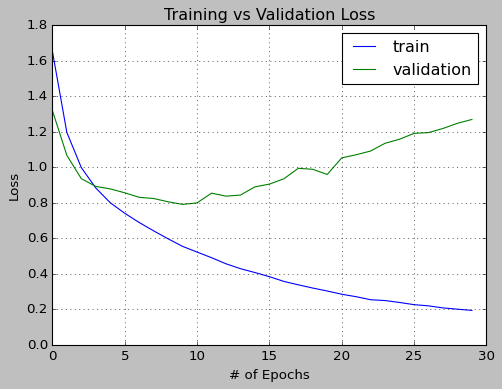

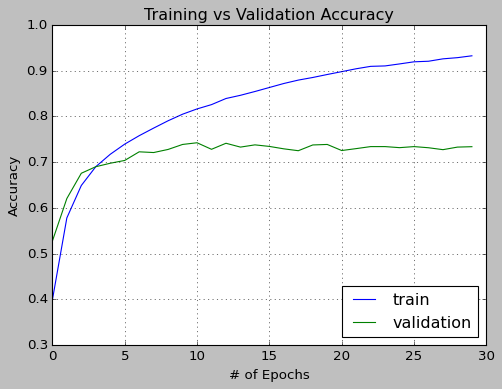

In [ ]:
num_epochs = 30
batch_size = 32
loss_function = 'categorical_crossentropy'

# For SGD
opt = "adam"
act_1 = "relu"
act_2 = "relu"

Adam_hist = CNN_model(opt, num_epochs, batch_size, loss_function, act_1, act_2)
acc_loss_plot(Adam_hist, num_epochs)

# Model 3 - Genetic Algorithm to find optimal parameters

As our 3rd model, we have chosen the genetic algorithm. Initially, 6 Neural Networks are manually created which will run for 5 generations with epochs of 30 and batch size of 32.

The maximum validation accuracy for Generation 5 is 77%.

#### **population**

List of dictionaries where each dictionary contains the parameters of the Neural Network. In every generation, the parameters will interchange based on random probability when it cross-overs after selection. 

#### **evaluating_fitness**

Calculates the fitness of each model, and returns it. Here, fitness is basically the validation accuracy of the model which is calculated by the x_test and y_test.

#### **selection**

Takes in the list of fitness values "fitness_list" as a parameter, and calculates the % i.e the (fitness / total fitness) * 100. A list "wheel" is then created which is the index times the number of occurences calculated prior. 2 parents are then randomly chosen based on a probability basis, and returned.

#### **crossover**

After selection, the 2 parents that are selected will be used for crossover i.e inter-changing the parametric values based on probability. This returns two childs (c1 and c2) i.e list of dictionaries.


#### **Parameters**

The configuration (parameters) of the neural networks contains multiple parameters. To know more about the specific optimizer, epoch, activation etc. used each neural network (M1, M2, M3, M4, M5, M6) refer to the population dictionary below.

- Optimizer : Adam, Adamax, Adagrad, SGD, Adadelta, RMSProp
- Loss Function : Categorical Cross-Entropy
- Epochs : 30
- Activation : ReLu, Selu, Elu & Sigmoid
- Batch size : 32
- Input : Normalized 32 x 32 x 3 images
- Metrics : Accuracy

In [ ]:
# Define parameters of each model

m1 = {
    'opt' : 'RMSProp',
    'act1' : 'relu',
    'act2' : 'elu'
}


m2 = {
    'opt' : 'adam',
    'act1' : 'relu',
    'act2' : 'relu'
}

m3 = {
    'opt' : 'adagrad',
    'act1' : 'relu',
    'act2' : 'selu'
}

m4 = {
    'opt' : 'SGD',
    'act1' : 'selu',
    'act2' : 'elu'
}

m5 = {
    'opt' : 'adamax',
    'act1' : 'relu',
    'act2' : 'sigmoid',
}

m6 = {
    
    'opt' : 'adadelta',
    'act1' : 'sigmoid',
    'act2' : 'selu',
}


population = [m1, m2 , m3, m4, m5, m6]

In [ ]:
# Fitness Evaluation Function
def evaluating_fitness(model_3):
    
    metrics = model_3.evaluate(x_test, y_test)
    
    return metrics[1]

# Selecting the parent for the next generation

def selection(fitness_list):
    
    total = sum(fitness_list)
    perc = []
    wheel = []
    
    # Calculating the % of the fitness and storing in the list -> 'perc'
    for i in fitness_list:
        
        val = round(((i/total) * 100))
        perc.append(val)
    
    print(perc)
    # Multiplying the index by the percentage
    for i in range(len(perc)):
        wheel.extend([i]*perc[i])

    p1_idx = choice(wheel)
    p2_idx = choice(wheel)

    return [p1_idx, p2_idx]

def crossover(p1, p2):
    
    c1 = {}
    c2 = {}

    c1["act1"] = choice([p1["act1"], p2["act1"]])
    c2["act1"] = choice([p1["act1"], p2["act1"]])

    c1["act2"] = choice([p1["act2"], p2["act1"]])
    c2["act2"] = choice([p1["act1"], p2["act2"]])

    c1["opt"] = choice([p1["opt"],p2["opt"]])
    c2["opt"] = choice([p1["opt"],p2["opt"]])

    return [c1, c2]

In [ ]:
# Run the model 
number_of_generations = 5
threshold = 85

# Fixed for all 
num_epochs = 30
batch_size = 32
loss_function = 'categorical_crossentropy'

for gen in range(number_of_generations):

    fitness_list = []
    
    for n_net in population:
        
        act1 = n_net["act1"]
        act2 = n_net["act2"]
        opt = n_net["opt"]

        model_3 = CNN_model(opt, num_epochs, batch_size, loss_function, act1, act2)
        accuracy = evaluating_fitness(model_3)
        print("Parameters: ", n_net)
        print("Validation Accuracy: ", round(accuracy , 3))

        fitness_list.append(accuracy)
    
    p_idx = selection(fitness_list)
    p1 = population[p_idx[0]]
    p2 = population[p_idx[1]]

    c = crossover(p1, p2)
    
    population.append(c[0])
    population.append(c[1])

    print("Generation ", gen+1," Outcome: ")
    if max(fitness_list) >= threshold:
        print("Obtained desired accuracy: ", max(fitness_list))
        break
    else:
        print("Max Accuracy in Generation",gen+1,"is - ",max(fitness_list))
    
    # Removing 2 NN from population whose fitness value is the least
    
    min_1 = fitness_list.index(min(fitness_list))
    population.remove(population[min_1])
    fitness_list.remove(fitness_list[min_1])

    min_2 = fitness_list.index(min(fitness_list))
    population.remove(population[min_2])
    fitness_list.remove(fitness_list[min_2])

Epoch 1/30
1563/1563 - 8s - loss: 1.6391 - Accuracy: 0.4116 - val_loss: 1.3533 - val_Accuracy: 0.5180 - 8s/epoch - 5ms/step
Epoch 2/30
1563/1563 - 7s - loss: 1.0879 - Accuracy: 0.6209 - val_loss: 1.0107 - val_Accuracy: 0.6541 - 7s/epoch - 4ms/step
Epoch 3/30
1563/1563 - 7s - loss: 0.8903 - Accuracy: 0.6919 - val_loss: 0.9278 - val_Accuracy: 0.6903 - 7s/epoch - 4ms/step
Epoch 4/30
1563/1563 - 7s - loss: 0.7747 - Accuracy: 0.7356 - val_loss: 0.9713 - val_Accuracy: 0.6709 - 7s/epoch - 4ms/step
Epoch 5/30
1563/1563 - 7s - loss: 0.6924 - Accuracy: 0.7624 - val_loss: 0.7892 - val_Accuracy: 0.7425 - 7s/epoch - 4ms/step
Epoch 6/30
1563/1563 - 7s - loss: 0.6340 - Accuracy: 0.7825 - val_loss: 0.8485 - val_Accuracy: 0.7295 - 7s/epoch - 4ms/step
Epoch 7/30
1563/1563 - 7s - loss: 0.5874 - Accuracy: 0.8004 - val_loss: 0.8268 - val_Accuracy: 0.7440 - 7s/epoch - 4ms/step
Epoch 8/30
1563/1563 - 7s - loss: 0.5548 - Accuracy: 0.8132 - val_loss: 0.7752 - val_Accuracy: 0.7560 - 7s/epoch - 4ms/step
Epoch 9/